<a href="https://colab.research.google.com/github/psm-optimizes/G2S3.QCO-ClassicalOptimizationLab/blob/main/CO-LAB-Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

# **LAB 2**

---

# **Install required packages**

In [ ]:
!pip install gurobipy

In [ ]:
!pip install numdifftools

# **Import required packages**

In [ ]:
import gurobipy as gp
from gurobipy import GRB
import cvxpy as cp
import numpy as np
import numdifftools as nd
import scipy as sp
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import math
import time
import datetime

I strongly suggest visiting the website of each package and surf through the documentations of each.

* [NumPy](https://numpy.org/): Working with n-dimensional arrays; *There is an ecosystem!*,
* [Gurobipy](https://www.gurobi.com/documentation/current/quickstart_mac/cs_python.html): Gurobi's python interface, capable of solving [a wide range of problems](https://www.gurobi.com/features/gurobi-optimizer-delivers-support-for-all-major-problem-types/#:~:text=Solve%20Your%20Most%20Complex%20Challenges,for%20all%20major%20problem%20types.&text=Model%20your%20problem%20the%20way,SOCP%20and%20bi%2Dlinear%20problems.),
* [CVXPY](https://www.cvxpy.org/#): open source Python-embedded modeling language for convex optimization problems,
* [SciPy](https://scipy.org/): scientific computing, linear algebra, optimization,
* [Networkx](https://networkx.org/documentation/stable/index.html): creation, manipulation, and study of the structure, dynamics, and functions of complex networks,
* [NumDiffTools](https://numdifftools.readthedocs.io/en/latest/): automatic numerical differentiation in one or more variables,
* [Pandas](https://pandas.pydata.org/): open source data analysis and manipulation tool,
* [Matplotlib](https://matplotlib.org/): creating static, animated, and interactive visualizations.

In [ ]:
# Full width output
np.set_printoptions(edgeitems=30, linewidth=100000)

# **Introduction to Networkx: Working with graphs**

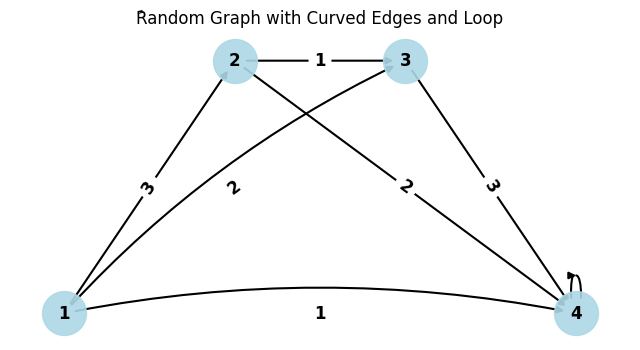

In [ ]:
from networkx import set_node_attributes, set_edge_attributes
# Create a directed graph
G = nx.DiGraph()

'''
Graph: Undirected graphs with self loops

DiGraph: Directed graphs with self loops

MultiGraph: Undirected graphs with self loops and parallel edges

MultiDiGraph: Directed graphs with self loops and parallel edges
'''

# Add nodes
G.add_nodes_from([1, 2, 3, 4])

# Add edges with flow capacities
G.add_edge(1, 2, capacity=3)
G.add_edge(1, 3, capacity=2)
G.add_edge(1, 4, capacity=1)
G.add_edge(2, 3, capacity=1)
G.add_edge(2, 4, capacity=2)
G.add_edge(3, 4, capacity=3)
G.add_edge(4, 4, capacity=4)

'''
You can also define attribute for nodes and edges using set_node_attributes and set_edge_attributes functions.
'''

# Set the new position of nodes for better visualization
pos = {1: (0, 0), 2: (2, 1), 3: (4, 1), 4: (6, 0)}

# Draw the graph with curved edges
plt.figure(figsize=(8, 4))

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=1000, node_color='lightblue', node_shape='o', alpha=0.9)

# Draw edges with curved connections
curved_edges = [(1,3), (1,4)]
nx.draw_networkx_edges(G, pos, edgelist=curved_edges, width=1.5, connectionstyle='arc3,rad=-0.1')

# Draw edges with loop connections
loop_edges = [(4,4)]
nx.draw_networkx_edges(G, pos, edgelist=loop_edges, width=1.5, connectionstyle='arc3,rad=-0.8')

# Draw the rest of the edges as straight lines
arc_edges = curved_edges + loop_edges
straight_edges = [(u, v) for u, v in G.edges() if (u, v) not in arc_edges]
nx.draw_networkx_edges(G, pos, edgelist=straight_edges, width=1.5, connectionstyle='arc3,rad=0')

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')

# Draw edge labels
labels = nx.get_edge_attributes(G, 'capacity')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=12, font_weight='bold')

plt.title('ًRandom Graph with Curved Edges and Loop', fontsize=12)
plt.axis('off')
plt.show()

# ***Exercise 1***


Create graphs with structure similar to one of the graphs shown below.

<img src="https://drive.google.com/uc?id=1XuTueV8BuYxysn1i_xdK4LuGreN_rSKi" alt="Alt text" width="500"/>

*credit: [tutorialspoint](https://www.tutorialspoint.com/graph_theory/types_of_graphs.htm)*

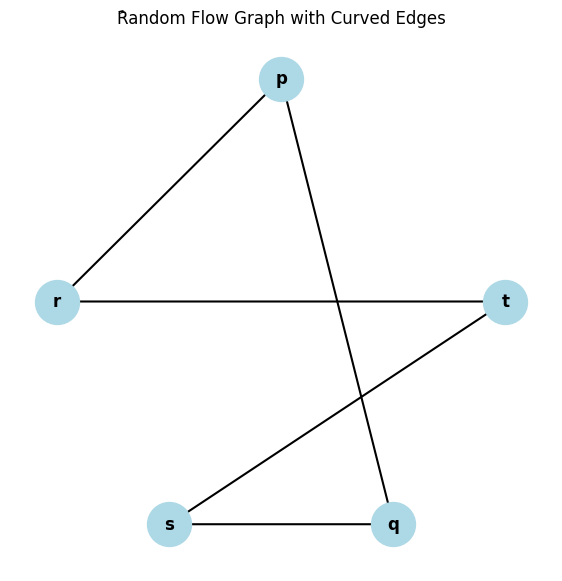

In [ ]:
#@markdown **Solution**

from networkx import set_node_attributes, set_edge_attributes
# Create your graph
G = nx.DiGraph()

# Add nodes
G.add_node('t')
G.add_node('p')
G.add_node('r')
G.add_node('s')
G.add_node('q')
''' or '''
# G.add_nodes_from(['t','p','r','s','q'])


# Add edges
G.add_edge('q', 'p')
G.add_edge('r', 'p')
G.add_edge('r', 't')
G.add_edge('t', 's')
G.add_edge('q', 's')
''' or '''
# G.add_edges_from([('q', 'p'), ('r', 'p'), ('r', 't'), ('t', 's'), ('q', 's')])


# Set the new position of nodes for better visualization
pos = {'r': (1,1), 's': (2,0), 'p': (3,2), 'q': (4,0), 't': (5,1)}

# Draw the graph with curved edges
plt.figure(figsize=(7, 7))

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=1000, node_color='lightblue', node_shape='o', alpha=1)

# Draw edges with curved connections
curved_edges = []
nx.draw_networkx_edges(G, pos, edgelist=curved_edges, width=1.5, connectionstyle='arc3,rad=0')

# Draw the rest of the edges as straight lines
straight_edges = [(u, v) for u, v in G.edges() if (u, v) not in curved_edges]
nx.draw_networkx_edges(G, pos, edgelist=straight_edges, width=1.5, connectionstyle='arc3,rad=0')

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')

# Draw edge labels
labels = nx.get_edge_attributes(G, 'capacity')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=12, font_weight='bold')

plt.title('ًRandom Flow Graph with Curved Edges', fontsize=12)
plt.axis('off')
plt.show()

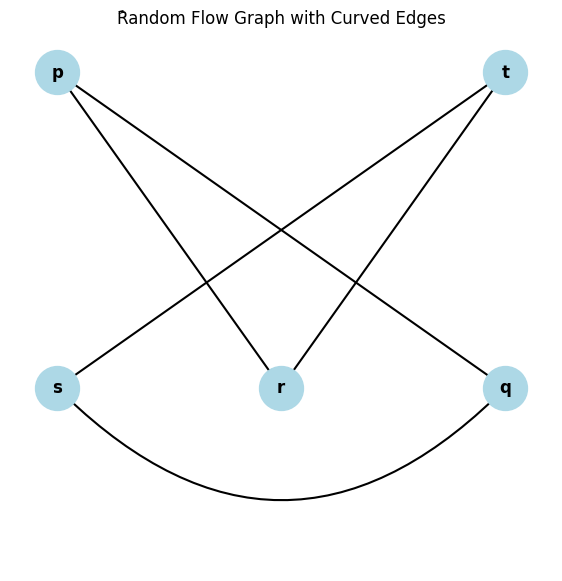

In [ ]:
#@markdown **Solution**

from networkx import set_node_attributes, set_edge_attributes
# Create your graph
G = nx.DiGraph()

# Add nodes
G.add_node('s')
G.add_node('p')
G.add_node('r')
G.add_node('q')
G.add_node('t')
''' or '''
# G.add_nodes_from(['t','p','r','s','q'])


# Add edges
G.add_edge('s', 'q')
G.add_edge('t', 's')
G.add_edge('q', 'p')
G.add_edge('p', 'r')
G.add_edge('t', 'r')
''' or '''
# G.add_edges_from([('q', 'p'), ('r', 'p'), ('r', 't'), ('t', 's'), ('q', 's')])


# Set the new position of nodes for better visualization
pos = {'s': (1,0), 'p': (1,2), 'r': (3,0), 'q': (5,0), 't': (5,2)}

# Draw the graph with curved edges
plt.figure(figsize=(7, 7))

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=1000, node_color='lightblue', node_shape='o', alpha=1)

# Draw edges with curved connections
curved_edges = [('s','q')]
nx.draw_networkx_edges(G, pos, edgelist=curved_edges, width=1.5, connectionstyle='arc3,rad=0.5')

# Draw the rest of the edges as straight lines
straight_edges = [(u, v) for u, v in G.edges() if (u, v) not in curved_edges]
nx.draw_networkx_edges(G, pos, edgelist=straight_edges, width=1.5, connectionstyle='arc3,rad=0')

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')

# Draw edge labels
labels = nx.get_edge_attributes(G, 'capacity')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=12, font_weight='bold')

plt.title('ًRandom Flow Graph with Curved Edges', fontsize=12)
plt.axis('off')
plt.show()

# **Minimum Spanning Tree**

Here, we take a look at the [minimum spaning tree](https://en.wikipedia.org/wiki/Minimum_spanning_tree#:~:text=A%20minimum%20spanning%20tree%20(MST,minimum%20possible%20total%20edge%20weight.) of a complete graph.


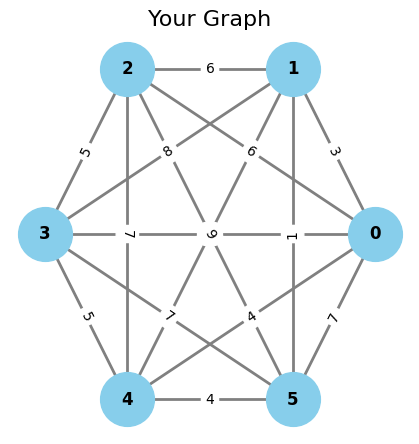

In [ ]:
# Number of nodes in the complete graph
num_nodes = 6

# Generate a graph with 'num_nodes' nodes; Or, we can call a complete graph from Networkx graph gallery.
G = nx.complete_graph(num_nodes)

# Assign random integer weights to the edges
for u, v in G.edges():
    weight = np.random.randint(1, 10)  # Assign random integer weight between 1 and 10
    G[u][v]['weight'] = weight

# Get positions for the nodes (circular layout)
pos = nx.circular_layout(G)

# Draw the graph
plt.figure(figsize=(4, 4))
nx.draw(G, pos, with_labels=True, node_size=1500, node_color='skyblue', font_size=12, font_weight='bold', width=2, edge_color='gray')
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

plt.title('Your Graph', fontsize=16)
plt.show()

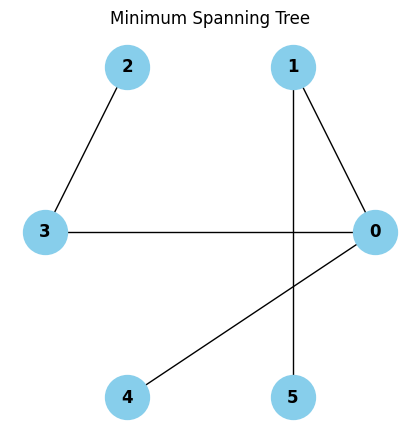

In [ ]:
from networkx import minimum_spanning_tree

MST = nx.minimum_spanning_tree(G, weight='weight', algorithm='kruskal', ignore_nan=False)
# pos = nx.spring_layout(G)

# Draw the minimum spanning tree
plt.figure(figsize=(4, 4))
nx.draw(MST, pos, with_labels=True, node_size=1000, node_color='skyblue', font_size=12, font_weight='bold')
plt.title("Minimum Spanning Tree")
plt.show()

Here, we used the ['Kruskal'](https://en.wikipedia.org/wiki/Kruskal%27s_algorithm) algorithm (default method). The other options are ['prim'](https://en.wikipedia.org/wiki/Prim%27s_algorithm), and ['boruvka'](https://en.wikipedia.org/wiki/Bor%C5%AFvka%27s_algorithm).

# **Exercise 2**

Create the graph in [minimum spaning tree](https://en.wikipedia.org/wiki/Minimum_spanning_tree#:~:text=A%20minimum%20spanning%20tree%20(MST,minimum%20possible%20total%20edge%20weight.) and call the minimum spanning tree on it!

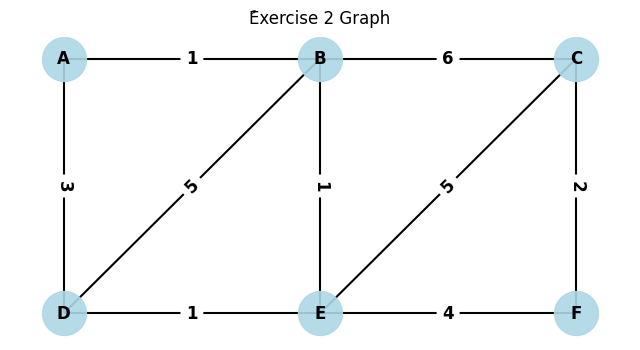

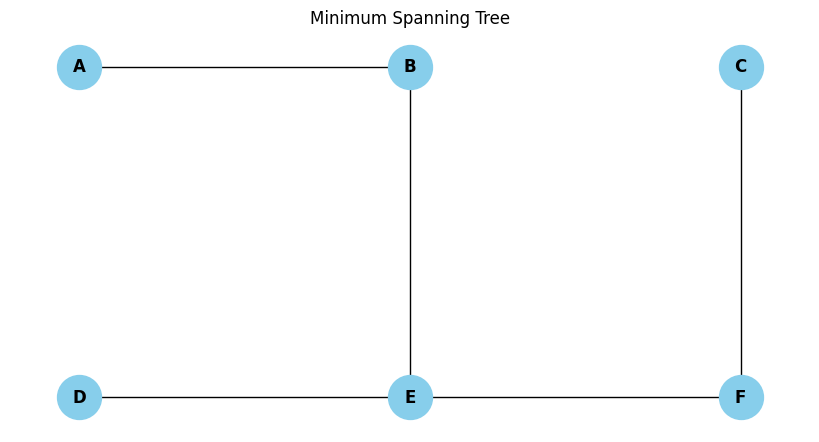

In [ ]:
#@markdown **Solution**


from networkx import set_node_attributes, set_edge_attributes
# Create a directed graph
G = nx.Graph()

# Add nodes
G.add_nodes_from(['A', 'B', 'C', 'D', 'E', 'F'])

# Add edges with flow capacities
G.add_edge('A', 'B', weight=1)
G.add_edge('A', 'D', weight=3)
G.add_edge('B', 'C', weight=6)
G.add_edge('B', 'D', weight=5)
G.add_edge('B', 'E', weight=1)
G.add_edge('C', 'E', weight=5)
G.add_edge('C', 'F', weight=2)
G.add_edge('D', 'E', weight=1)
G.add_edge('E', 'F', weight=4)


'''
You can also define attribute for nodes and edges using set_node_attributes and set_edge_attributes functions.
'''

# Set the new position of nodes for better visualization
pos = {'A': (0, 2), 'B': (2, 2), 'C': (4, 2), 'D': (0, 0), 'E': (2, 0), 'F': (4, 0)}

# Draw the graph with curved edges
plt.figure(figsize=(8, 4))

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=1000, node_color='lightblue', node_shape='o', alpha=0.9)

# Draw the straight lines
straight_edges = [(u, v) for u, v in G.edges()]
nx.draw_networkx_edges(G, pos, edgelist=straight_edges, width=1.5)

# Draw node labels
nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')

# Draw edge labels
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=12, font_weight='bold')

plt.title('ًExercise 2 Graph', fontsize=12)
plt.axis('off')
plt.show()

############################
# Call minimum_spanning_tree
############################

from networkx import minimum_spanning_tree

MST = nx.minimum_spanning_tree(G, weight='weight', algorithm='kruskal', ignore_nan=False)

# Draw the minimum spanning tree
plt.figure(figsize=(8, 4))
nx.draw(MST, pos, with_labels=True, node_size=1000, node_color='skyblue', font_size=12, font_weight='bold')
plt.title("Minimum Spanning Tree")
plt.show()

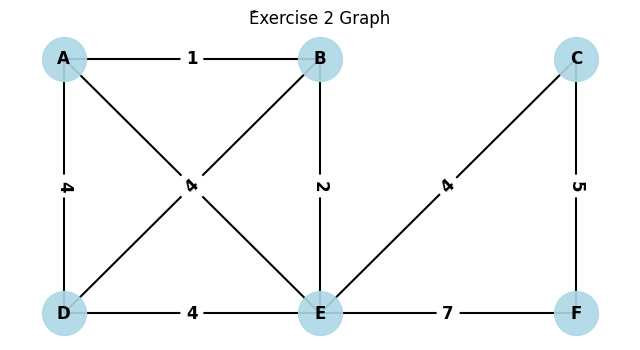

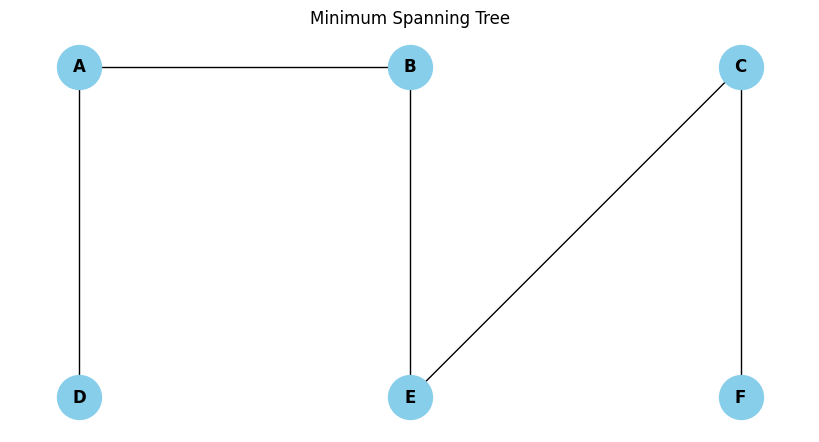

In [ ]:
#@markdown **Solution**


from networkx import set_node_attributes, set_edge_attributes
# Create a directed graph
G = nx.Graph()

# Add nodes
G.add_nodes_from(['A', 'B', 'C', 'D', 'E', 'F'])

# Add edges with flow capacities
G.add_edge('A', 'B', weight=1)
G.add_edge('A', 'D', weight=4)
G.add_edge('A', 'E', weight=3)
G.add_edge('B', 'D', weight=4)
G.add_edge('B', 'E', weight=2)
G.add_edge('C', 'E', weight=4)
G.add_edge('C', 'F', weight=5)
G.add_edge('D', 'E', weight=4)
G.add_edge('E', 'F', weight=7)


'''
You can also define attribute for nodes and edges using set_node_attributes and set_edge_attributes functions.
'''

# Set the new position of nodes for better visualization
pos = {'A': (0, 2), 'B': (2, 2), 'C': (4, 2), 'D': (0, 0), 'E': (2, 0), 'F': (4, 0)}

# Draw the graph with curved edges
plt.figure(figsize=(8, 4))

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=1000, node_color='lightblue', node_shape='o', alpha=0.9)

# Draw the straight lines
straight_edges = [(u, v) for u, v in G.edges()]
nx.draw_networkx_edges(G, pos, edgelist=straight_edges, width=1.5)

# Draw node labels
nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')

# Draw edge labels
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=12, font_weight='bold')

plt.title('ًExercise 2 Graph', fontsize=12)
plt.axis('off')
plt.show()

############################
# Call minimum_spanning_tree
############################

from networkx import minimum_spanning_tree

MST = nx.minimum_spanning_tree(G, weight='weight', algorithm='kruskal', ignore_nan=False)

# Draw the minimum spanning tree
plt.figure(figsize=(8, 4))
nx.draw(MST, pos, with_labels=True, node_size=1000, node_color='skyblue', font_size=12, font_weight='bold')
plt.title("Minimum Spanning Tree")
plt.show()

# **Flow Polytope**

**Flow polytope**

Consider a directed and acyclic graph $G=(V,E)$,  where $|V|=n+1$.

The netflow vector is defined as $\textbf{a} = (a_1,a_2,...,a_n, - \sum_{i}^n a_i)$, where $a_i \in \mathbb{Z}_{\geq 0}^{n}$.

$ \mathbb{F}_{G}(\textbf{a}) = \left\{ \text{flows} \ x(\epsilon) \in \mathbb{R}_{\geq 0}, \epsilon \in E(G) | \text{ netflow vertex } i = a_i \right\}$.

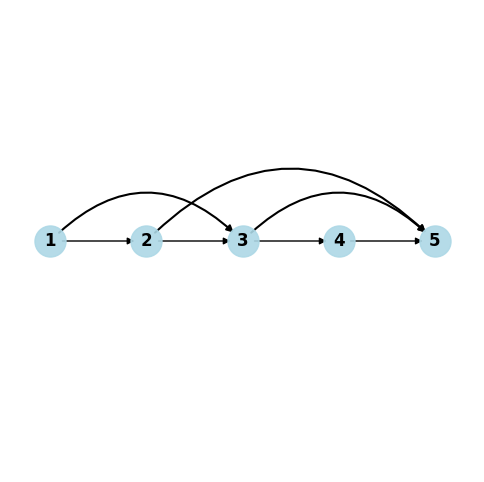

In [ ]:
# Create a graph
G = nx.MultiDiGraph()

# Add nodes
G.add_nodes_from([1, 2, 3, 4, 5])

# Add edges
G.add_edge(1, 2)
G.add_edge(1, 3)
G.add_edge(2, 3)
G.add_edge(2, 5)
G.add_edge(3, 4)
G.add_edge(3, 5)
G.add_edge(4, 5)

# Set node demands
Demand = nx.set_node_attributes(G, {1: -5, 2: 0, 3: 0, 4: 0, 5: 5}, name="demand")

# Set edge costs
for u, v in G.edges():
    cost = np.random.randint(1, 8)  # Assign random integer weight between 1 and 8
    G[u][v][0]['cost'] = cost
edge_costs = nx.get_edge_attributes(G, 'cost')

# Set the position of nodes for better visualization
pos = {1: (0, 0), 2: (2, 0), 3: (4, 0), 4: (6, 0), 5: (8, 0)}

# Draw the graph with curved edges
plt.figure(figsize=(6, 6))

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='lightblue', node_shape='o', alpha=0.9)

# Draw curved edges
curved_edges_1 = [(1, 3), ]
nx.draw_networkx_edges(G, pos, edgelist=curved_edges_1, width=1.5, connectionstyle='arc3,rad=-0.5')

curved_edges_2 = [(2, 5)]
nx.draw_networkx_edges(G, pos, edgelist=curved_edges_2, width=1.5, connectionstyle='arc3,rad=-0.5')

curved_edges_3 = [(3, 5)]
nx.draw_networkx_edges(G, pos, edgelist=curved_edges_3, width=1.5, connectionstyle='arc3,rad=-0.5')

# Draw the rest of the edges as straight lines
straight_edges = [(1, 2), (2, 3), (3, 4), (4, 5)]
nx.draw_networkx_edges(G, pos, edgelist=straight_edges, width=1)

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')

# Set y-limits
plt.ylim(-0.2, 0.2)

plt.axis('off')
plt.show()

***Think about the ways that starting from Node 1 you can get to Node 5. Can you enumerate them?***


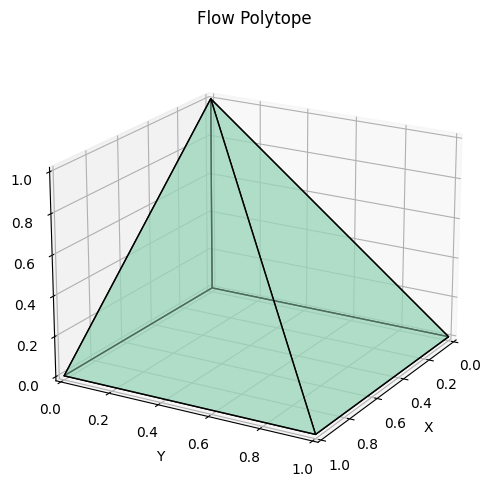

In [ ]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Define the vertices of the simplex
vertices = np.array([[0, 0, 0],
                     [1, 0, 0],
                     [0, 1, 0],
                     [0, 0, 1],
                     [1, 1, 0]])

# Define the face of the simplex
faces = [[vertices[0], vertices[1], vertices[3]],
         [vertices[0], vertices[2], vertices[3]],
         [vertices[2], vertices[3], vertices[4]],
         [vertices[1], vertices[3], vertices[4]],
         [vertices[0], vertices[1], vertices[4], vertices[2]]]

# Create a 3D plot
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the tetrahedron
ax.add_collection3d(Poly3DCollection(faces, facecolors=(0.6,0.84,0.73), linewidths=1, edgecolors='black', alpha=0.5))

# Set axis labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Set axis limits
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])

# Set the viewpoint
ax.view_init(20, 30)

plt.title('Flow Polytope')
plt.show()


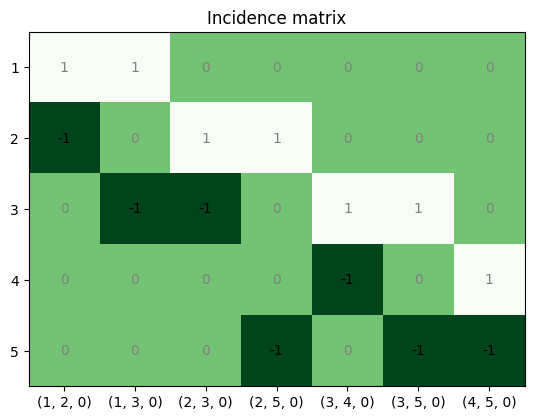

In [ ]:
# Plotting the incidence matrix
fig, ax = plt.subplots()
ax.imshow(nx.incidence_matrix(G, oriented = True).todense(), cmap="Greens")
ax.set_xticks(np.arange(len(G.edges)))
ax.set_yticks(np.arange(len(G.nodes)))
ax.set_xticklabels(G.edges)
ax.set_yticklabels(G.nodes)

for i in range(len(G.nodes)):
    for j in range(len(G.edges)):
        text_color = 'black' if nx.incidence_matrix(G, oriented = True).todense()[i, j] == (1 or -1) else 'gray'
        text = ax.text(j, i, int(-nx.incidence_matrix(G, oriented = True).todense()[i, j]), ha="center", va="center", color=text_color)

ax.set_title("Incidence matrix", fontsize=12)
plt.show()

In [ ]:
from networkx import incidence_matrix
incidence = incidence_matrix(G, oriented = True).todense()

In [ ]:
#@markdown **isTU oracle**

# Alberto Rodriguez Sanchez, 2016
# http://pythonfiddle.com/testtu/
#
# This program decide if one matrix A is totally unimodular iff it follows the next rules
#
# Rule 1: Has only elements 1,0 or -1
# Rule 2: Don't have the next four sub matrices
#      | 1  1 | or |-1  1 | or  | 1 -1 | or | 1 1 |
#      | 1 -1 |    | 1  1 |     | 1  1 |    |-1 1 |

import itertools

def checkRule1(A):
    m,n = A.shape
    '''check if every element in A is 0,1 or -1'''
    for i in range(m):
        for j in range(n):
            if A[i][j] != 0 and A[i][j] !=1 and  A[i][j] != -1:
                return False
    else:
        return True

def checkRule2(A,r,c):
    '''Check if one submatrix has determinant 0,1 or -1'''
    det=A[r[0]][c[0]]*A[r[1]][c[1]]- A[r[1]][c[0]]*A[r[0]][c[1]]
    if det == 1 or det == -1 or det==0:
        return True
    else:
        return False

def isTU(A):
    '''
       Check Rule 1 for matrix A
       Generate all 2x2 submatrices of A and check rule 2
    '''
    if checkRule1(A):
        n,m=A.shape
        N=range(n)
        M=range(m)
        rows=itertools.permutations(N,2)
        columns=itertools.permutations(M,2)
        for r in rows:
            for c in columns:
                if not checkRule2(A,r,c):
                   return False
        return True
    else:
        return False


In [ ]:
isTU(incidence)

True

In [ ]:
isTU(np.random.rand(5,4))

False

**Mathematical Description of the Flow Polytope**

Let $\chi$ denote the flow polytope. Then, element of this set can be describes as
\begin{equation*}
  x \in \chi = \left\{ x \in \mathbb{R}^m : \ Dx = r, \ l\leq x \leq u \right\},
\end{equation*}
where $D$ is the incidence matrix of the graph $G$, and $r \in \mathbb{R}^n \ (\sum_{i=1}^{n} r_i = 0)$, is the vector of the
requirements of the nodes.

Since matrix $[D \mid r]$ has rank $n-1$, introducing an auxiliary variable/arc $x_0$ is useful. Thus, the region $\chi$ can be written as:
\begin{equation*}
  \chi = \left\{ x \in \mathbb{R}^m : \ Dx + e^1 x_{0} = r, \ l \leq x \leq u , \ 0 \leq x_0 \leq 0 \right\},
\end{equation*}
where $e^1 = (1, 0, \dots, 0)^T$. Moreover, the column $k$ of matrix $D$ denoted as $D^K = (D_h^k)$ corresponding to $k$_th arc $(i,j) \in E $ is defined by:
\begin{align}
D_h^k =
\begin{cases}
1 & {\rm if} \ h =i, \\
-1 & {\rm if} \ h = j, \\
0 & {\rm otherwise}.
\end{cases}
\end{align}

# **Conditional Gradient Descent (Frank-Wolfe) Algorithm**

**Problem Statement**:

Suppose $\chi$ is a compact convex set in a vector space and $f\colon \chi \to {\mathbb  {R}}$ is a convex, differentiable real-valued function. The [Frank-Wolfe](https://en.wikipedia.org/wiki/Frank%E2%80%93Wolfe_algorithm) algorithm solves the optimization problem
\begin{align}
{\rm min} & \ f(x), \\
{\rm s.t.}& \ x \in \chi.
\end{align}

The conditional gradient descent algorithm minimizes a smooth convex function $f$ over a compact set $\chi$. This method performs the following update for $t \geq 1 $, where $(\gamma_s)_{s \geq 1}$ is a fixed sequence,
\begin{align}
y_t \in {\rm argmin}_{x \in \chi} \nabla f(x_t)^T y, \\
x_{t+1} = (1-\gamma_t) x_t + \gamma_t y_t.
\end{align}

Interpretation: Minimize the linear approximation of the problem given by the **first-order Taylor approximation** of $f$ around ${\bf x}_k$ constrained to stay within $\chi$.


<img src="https://drive.google.com/uc?id=1xO2YkWKXJjUmx2MSdGyiDlPlFKMTlbjG" alt="Alt text" width="500"/>


Some implementations of Frank-Wolfe algorithm choose a sequence for $\gamma$ as $\gamma_t = 2 / (t+2)$, but the step size can be computed by linesearch, too.

In [ ]:
#@markdown **Line Search Oracle: x_min, gamma = segment_search(f, x, y, tol=1e-6, stepsize=True)**

def segment_search(f, x, y, tol=1e-6, stepsize=True):

    #line-search using golden-section rule coded from scratch

    '''
    Minimizes f over [x, y], i.e., f(x+gamma*(y-x)) as a function of scalar gamma in [0,1]
    '''
    grad_f = nd.Gradient(f)
    # restrict segment of search to [x, y]
    d = (y-x).copy()
    left, right = x.copy(), y.copy()

    # if the minimum is at an endpoint
    if np.dot(d, grad_f(x))*np.dot(d, grad_f(y)) >= 0:
        if f(y) <= f(x):
            return y, 1
        else:
            return x, 0

    # apply golden-section method to segment
    gold = (1+np.sqrt(5))/2
    improv = np.inf
    while improv > tol:
        old_left, old_right = left, right
        new = left+(right-left)/(1+gold)
        probe = new+(right-new)/2
        if f(probe) <= f(new):
            left, right = new, right
        else:
            left, right = left, probe
        improv = np.linalg.norm(f(right)-f(old_right))+np.linalg.norm(f(left)-f(old_left))
    x_min = (left+right)/2

    # compute step size gamma
    gamma = 0
    if stepsize == True:
        for i in range(len(d)):
            if d[i] != 0:
                gamma = (x_min[i]-x[i])/d[i]
                break

    return x_min, gamma

In [ ]:
from time import process_time
from scipy.optimize import linprog

def FW(func, x, epsilon, f_tol, time_tol):

    # Record primal gap, function value, and time every iteration
    now=datetime.datetime.now()
    primal_gap = []
    function_value=[func(x)]
    time = [0]
    f_improv = np.inf

    # Initialize iteration count
    t = 0

    while f_improv > f_tol and time[-1] < time_tol:

        start = process_time()

        # Take gradient of f
        grad_f = nd.Gradient(func)
        # Compute gradient
        grad = grad_f(x)

        # Solve linear subproblem and compute FW direction
        v = linprog(grad, A_ineq, b_ineq, A_eq, b_eq, bounds, method='highs')
        yt = v.x
        d_FW = yt-x

        # If primal gap is small enough - terminate
        if np.dot(-grad,d_FW) <= epsilon:
            break
        else:
            # Update convergence data
            primal_gap.append(np.dot(-grad,d_FW))

        # Update next iterate by doing a feasible line-search
        x, gamma = segment_search(func, x, yt)

        end = process_time()

        time.append(time[t] + end - start)
        f_improv = function_value[-1] - func(x)
        function_value.append(func(x))

        t+=1

    return x, function_value

**Example: Portfolio Optimization**

Markowitz Mean-Variance Model

* For a given set of $n$ assets, let ${\bf r} = [r_1 , \dots , r_n]^T$ and $D = \{D_{ij}\}_{i,j=1}^n$ denote the vector of expected returns and matrix of covariance, respectively.

* To find an investment portfolio with the minimum risk subject to receiving an expected return, we may consider the following Markowitz mean-variance model:

\begin{align}
\min & \ \frac{1}{2} {\bf x}^T D {\bf x} \\
{\rm s.t.} & \ {\bf r}^T {\bf x}  \geq r_0 \\
           & \ {\bf e}^T {\bf x}  = 1   \\  
           & \ x_i \geq 0, && i \in [n].
\end{align}

* The variable indicate the percentage of budget to be invested in a specific stock.

* This is a *Linearly Constrained Quadratic Programming (LCQP)* problem.

We are going to use the [yfinance](https://pypi.org/project/yfinance/) and [pyportfolioopt](https://pyportfolioopt.readthedocs.io/en/latest/) packages to access and analyze a sample data from the stock market.

In [ ]:
!pip install yfinance

In [ ]:
!pip install pyportfolioopt

In [ ]:
# from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models, expected_returns, plotting
import yfinance as yf

In [ ]:
# Getting dataframes info for Stocks using yfinance
aapl_df = yf.download('AAPL', start = '2021-08-02', end = '2023-08-02')
tsla_df = yf.download('TSLA', start = '2021-08-02', end = '2023-08-02')
nvda_df = yf.download('NVDA', start = '2021-08-02', end = '2023-08-02')
amzn_df = yf.download('AMZN', start = '2021-08-02', end = '2023-08-02')
uber_df = yf.download('UBER', start = '2021-08-02', end = '2023-08-02')

# Extracting Adjusted Close for each stock
aapl_df = aapl_df['Adj Close']
tsla_df = tsla_df['Adj Close']
nvda_df = nvda_df['Adj Close']
amzn_df = amzn_df['Adj Close']
uber_df = uber_df['Adj Close']

# Merging and creating an Adj Close dataframe for stocks
df = pd.concat([aapl_df, tsla_df, nvda_df, amzn_df, uber_df], join = 'outer', axis = 1)
df.columns = ['AAPL', 'TSLA', 'NVDA', 'AMZN', 'UBER']
df # Visualizing dataframe for input

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,AAPL,TSLA,NVDA,AMZN,UBER
Date,,,,,
2021-08-02,143.834473,236.556671,197.202637,166.574005,43.490002
2021-08-03,145.653137,236.580002,197.851654,168.311996,42.790001
2021-08-04,145.247894,236.973328,202.434753,167.735992,41.810001
2021-08-05,145.356644,238.210007,206.059280,168.799500,43.070000
2021-08-06,144.663712,233.033340,203.353378,167.246994,44.279999
...,...,...,...,...,...
2023-07-26,194.500000,264.350006,454.519989,128.149994,47.310001
2023-07-27,193.220001,255.710007,459.000000,128.250000,46.610001
2023-07-28,195.830002,266.440002,467.500000,132.210007,48.139999


In [ ]:
# Calculating the annualized expected returns
r = expected_returns.mean_historical_return(df) #expected returns
print('expected returns vector:')
print(r)

# Calculating the annualized sample covariance matrix
D = risk_models.sample_cov(df) #Covariance matrix
print('Covariance Matrix:')
print(D)

expected returns vector:
AAPL    0.166890
TSLA    0.050742
NVDA    0.538314
AMZN   -0.111271
UBER    0.035838
dtype: float64
Covariance Matrix:
          AAPL      TSLA      NVDA      AMZN      UBER
AAPL  0.087033  0.102950  0.113288  0.079633  0.069852
TSLA  0.102950  0.377322  0.202156  0.125514  0.146906
NVDA  0.113288  0.202156  0.340636  0.145624  0.155507
AMZN  0.079633  0.125514  0.145624  0.170522  0.118664
UBER  0.069852  0.146906  0.155507  0.118664  0.297913


You can plot the covariance matrix using following line of code.

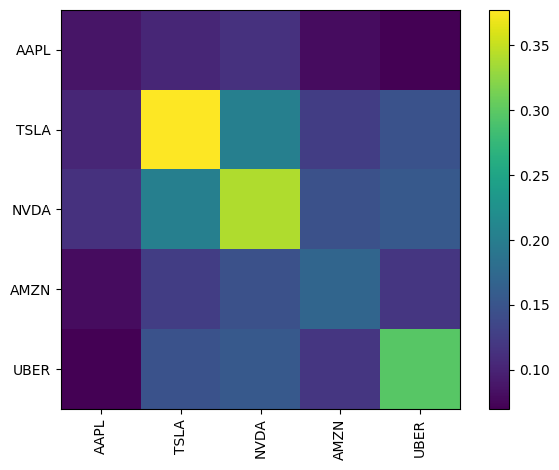

In [ ]:
plotting.plot_covariance(D);

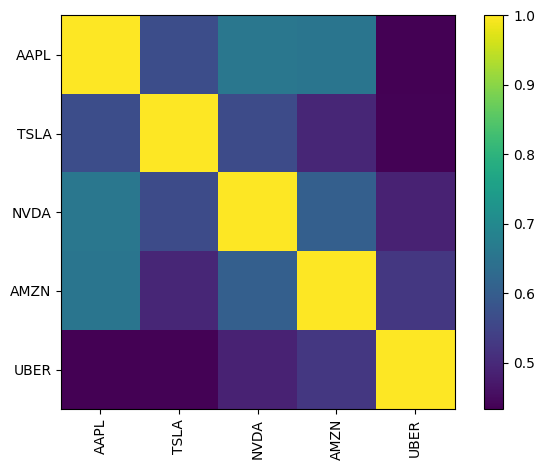

In [ ]:
plotting.plot_covariance(D, plot_correlation = True);

In [ ]:
# Define the vector of return requirements
r0 = np.random.rand()
while r0 > np.max(r.to_numpy(dtype=None, copy=False)):
  r0 = np.random.rand()
r0

0.09234015841079446

In [ ]:
def quad_obj_func(x):
  return 0.5*np.matmul(np.matmul(x,D),x)

In [ ]:
# Data compilation
# A_ineq = np.zeros((1,len(r)))
A_ineq = np.asmatrix(r.to_numpy(dtype=None, copy=False))
b_ineq = r0
# A_eq   = np.zeros((1,len(r)))
A_eq   = np.asmatrix(np.ones(len(r)))
b_eq   = [1]
x0     = np.ones(len(r))
bounds = [(0, 'inf') for i in range(len(r))]
iterations = 1000
epsilon = 10**(-4)
f_tol = 10**(-2)
time_tol = 1000

# Call Frank-Wolfe algorithm to solve the Linearly Constrained Quadratic Programming (LCQP) problem
x, function_record = FW(quad_obj_func, x0, epsilon, f_tol, time_tol);

# Print the result
print('Optimal Solution  :', x)
print('Our Stock Options :',' AAPL   TSLA  NVDA  AMZN  UBER')
print('Our Decision (%)  :', np.round(x*100,2))
# print('Objective Function Record:', function_record)

Optimal Solution  : [0.92960065 0.         0.         0.         0.07039935]
Our Stock Options :  AAPL   TSLA  NVDA  AMZN  UBER
Our Decision (%)  : [92.96  0.    0.    0.    7.04]


# **Semidefinite Programming (SDP): Solving SDP**

*  The primal SDP:
\begin{align*}
  \min & \ {\rm Tr} \ (CX) \\
  {\rm s.t.} & \  {\rm Tr} \ (A^i X) = b_i, && {\rm for} \ i \in [m] \\
       & \ X \succeq 0,\\
\end{align*}

* The dual SDP:
\begin{align*}
  \max & \ b^T y \\
  {\rm s.t.} & \ \sum_{i=1}^{m} y_i A^i + S = C,  \\
       & \ S \succeq 0, \ y \in \mathbb{R}^m.
\end{align*}

<img src="https://drive.google.com/uc?id=1BjG5bosNJXwLOP5IGdoD-XUu6wPKIxhw" alt="Alt text" width="500"/>

*credit: [CVX Research](http://cvxr.com/)*

What are the possible outcomes of intersection?

For a visual presentation of the concept of semidefinite programming, you can watch the following [video](https://www.youtube.com/watch?v=9z2OtPOi8T0).

**Introduction to [CVXPY](https://www.cvxpy.org/examples/basic/sdp.html) (for Semidefinite Programs)**

For setting paramters of the solver, see: [SCS Solver](https://www.cvxgrp.org/scs/api/c.html#_CPPv4N11ScsSettings7eps_relE).

Furthermore, you can change the solver to MOSEK, CVXOPT, SDPA, and COPT. To do this and also set further parameters, visit: [link](https://www.cvxpy.org/tutorial/advanced/index.html).

# ***Exercise 3***

**The $n$-elliptope problem**

For $n=3$, consider the problem of
\begin{align}
  \min\left\{ 4x-4y-2z |
  \begin{bmatrix}
  1 & x & y \\
  x & 1 & z \\
  y & z & 1 \\
  \end{bmatrix} \succeq 0 \right\},
\end{align}

which can be represented as a standard SDP in primal form by defining $b = (1,1,1)^T$, and

$$
A^1 =
\begin{bmatrix}
1 & 0 & 0 \\
0 & 0 & 0 \\
0 & 0 & 0 \\
\end{bmatrix},
\quad
A^2 =
\begin{bmatrix}
0 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 0 \\
\end{bmatrix},
\quad
A^3 =
\begin{bmatrix}
0 & 0 & 0 \\
0 & 0 & 0 \\
0 & 0 & 1 \\
\end{bmatrix},
\quad
C =
\begin{bmatrix}
 0 &  2 & -2 \\
 2 &  0 & -1 \\
-2 & -1 &  0 \\
\end{bmatrix}.
$$

The problem has a unique optimal solution given by
$$
X^* =
\begin{bmatrix}
 1 & -1 &  1 \\
-1 &  1 & -1 \\
 1 & -1 &  1 \\
\end{bmatrix},
\quad
y^* =
\begin{bmatrix}
-4 & -1 & -1 \\
\end{bmatrix}^T,
\quad
S^* =
\begin{bmatrix}
 4 &  2 & -2 \\
 2 &  1 & -1 \\
-2 & -1 &  1 \\
\end{bmatrix}.
$$

Let's take a look at the 3-elliptope region.


<img src="https://drive.google.com/uc?id=1r7M5f1eZ7rkyn7wl53tzcYon9ffP02Tk" alt="Alt text" width="500"/>


What characterizes this elliptope?

In [ ]:
#@markdown **Solution**

### Set n,m.
n = 3
m = 3

### Group Example
C = np.array([[ 0,  2, -2],
              [ 2,  0, -1],
              [-2, -1,  0]])
A = np.zeros((m,n,n))
for i in range(n):
  A[i,i,i]=1
b = np.ones(n)


### Define and solve the CVXPY problem.
# Create a symmetric matrix variable.
X = cp.Variable((n,n), symmetric=True)

### Define the constraints
constraints = [X >> 0] # The operator >> denotes matrix inequality.

constraints += [
    cp.trace(A[i] @ X) == b[i] for i in range(m)
]
### Setting the problem
prob = cp.Problem(cp.Minimize(cp.trace(C @ X)),
                  constraints)
### Solve
prob.solve(verbose = True, eps = 10**(-8) )

print('################################')
print('The optimal solution X is = \n', X.value)

                                     CVXPY                                     
                                     v1.3.2                                    
(CVXPY) Aug 03 08:06:18 PM: Your problem has 9 variables, 4 constraints, and 0 parameters.
(CVXPY) Aug 03 08:06:18 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Aug 03 08:06:18 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Aug 03 08:06:18 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Aug 03 08:06:18 PM: Compiling problem (target solver=SCS).
(CVXPY) Aug 03 08:06:18 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> S

In [ ]:
Xopt = np.array([[1,-1,1],[-1,1,-1],[1,-1,1]])
yopt = np.array([-4,-1,-1])
Sopt = np.array([[4,2,-2],[2,1,-1],[-2,-1,1]])

In [ ]:
np.linalg.norm(X.value-Xopt)

We can also find the dual variables.

In [ ]:
y = np.zeros(m)
for i in range(m+1):
  if (i==0):
    print('S = \n', constraints[i].dual_value)
  else:
    y[i-1] = constraints[i].dual_value

print('y = ', y)

S = 
 [[ 4.  2. -2.]
 [ 2.  1. -1.]
 [-2. -1.  1.]]
y =  [4. 1. 1.]


# **Semidefinite Programming (SDP) for Max-Cut: Hyperplane Rounding Algorithm (Goemans & Williamson, 1995)**

Let's retrun to Max-Cut.

* Mathematical Formulation:
\begin{align*}
  \max & \sum_{{\rm edges} \  (i,j)} \frac{1-x_i x_j}{2} \\
       & x_i \in \{ -1,1 \}
\end{align*}
* Relaxation #1:
\begin{align*}
  \max & \sum_{{\rm edges} \  (i,j)} \frac{1-x_i x_j}{2} \\
       & x_i \in \mathbb{R}^n, \|x_i\|=1.
\end{align*}
*   Lifting of boolean constraints $x_i \in \{-1,1\}$:
  \begin{equation*}
  x_i^2 = 1  \quad \Leftrightarrow \quad X = xx^T, \  {\rm \bf diag}(X) = e.
  \end{equation*}
*   Let $X = [x_i^T x_j]_{i,j}$.
*   Then, we have:
\begin{align*}
  \max & \sum_{{\rm edges}} \frac{1-X_{ij}}{2} \\
       & X \in \mathbb{R}^{n \times n}, \\
       & X \succeq 0,\\
       & X_{ii} = 1, \ i=1,...,n.
\end{align*}




* The dual problem is:
\begin{align*}
  \min & \sum_{y \ \in \ \mathbb{R}^n,\  S \ \in \mathbb{S}^n} y_i \\
       & S = {\rm Diag}(y) - C, \\
       & S \succeq 0.
\end{align*}


* Recall that the original Max-Cut is NP-Hard.

* Hyperplane rounding algorithm is an approximation algorithm with an approximation ratio of $\approx 0.878$.

* The approximation ratio is the ratio of the cut found by the approximation algorithm divided the by the actual "Max"-Cut.

* Thus, we are not solving Max-Cut exactly.


Create a random complete graph with random edge weights.

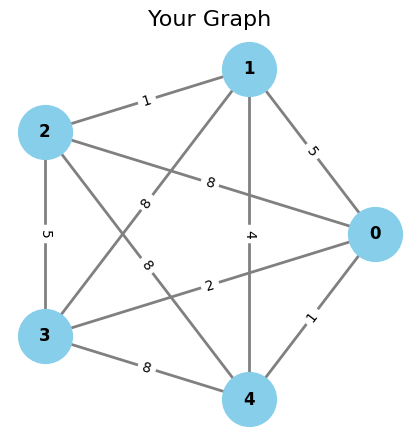

In [ ]:
# Number of nodes in the complete graph
num_nodes = 5

# Generate a graph with 'num_nodes' nodes; Or, we can call a complete graph from Networkx graph gallery.
G = nx.complete_graph(num_nodes)

# Assign random integer weights to the edges
for u, v in G.edges():
    weight = np.random.randint(1, 10)  # Assign random integer weight between 1 and 10
    G[u][v]['weight'] = weight

# Get positions for the nodes (circular layout)
pos = nx.circular_layout(G)

# Draw the graph
plt.figure(figsize=(4, 4))
nx.draw(G, pos, with_labels=True, node_size=1500, node_color='skyblue', font_size=12, font_weight='bold', width=2, edge_color='gray')
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

plt.title('Your Graph', fontsize=16)
plt.show()

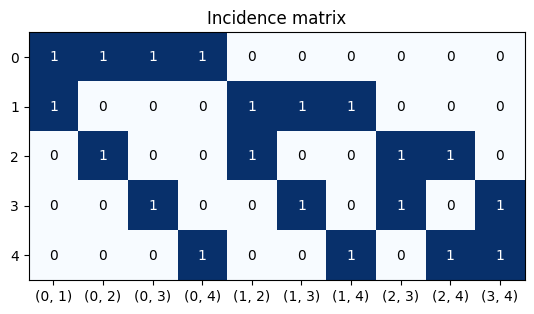

In [ ]:
# Plotting the Incidence matrix
fig, ax = plt.subplots()
ax.imshow(nx.incidence_matrix(G).todense(), cmap="Blues")
ax.set_xticks(np.arange(len(G.edges)))
ax.set_yticks(np.arange(len(G.nodes)))
ax.set_xticklabels(G.edges)
ax.set_yticklabels(G.nodes)

for i in range(len(G.nodes)):
    for j in range(len(G.edges)):
        text_color = 'black' if nx.incidence_matrix(G).todense()[i, j] == 0 else 'white'
        text = ax.text(j, i, int(nx.incidence_matrix(G).todense()[i, j]), ha="center", va="center", color=text_color)

ax.set_title("Incidence matrix", fontsize=12)
plt.show()

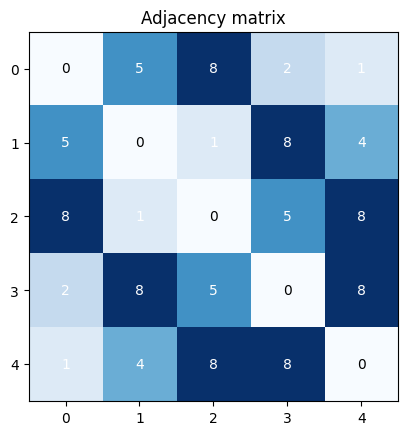

In [ ]:
# Plotting the Adjacency matrix
fig, ax = plt.subplots()
ax.imshow(nx.adjacency_matrix(G).todense(), cmap="Blues")
ax.set_xticks(np.arange(len(G.nodes)))
ax.set_yticks(np.arange(len(G.nodes)))
ax.set_xticklabels(G.nodes)
ax.set_yticklabels(G.nodes)

for i in range(len(G.nodes)):
    for j in range(len(G.nodes)):
        text_color = 'black' if nx.adjacency_matrix(G).todense()[i, j] == 0 else 'white'
        text = ax.text(j, i, nx.adjacency_matrix(G).todense()[i, j], ha="center", va="center", color=text_color)

ax.set_title("Adjacency matrix", fontsize=12)
plt.show()

**Solve the Max-Cut SDP relaxation for the generated complete graph (without weight!)**

We use CVXPY to solve the SDP problem associated with Max-cut problem.

In [ ]:
# Define number of nodes and enumerate the edges
nodes = G.nodes
edges = G.edges

# Define the problem for CVXPY
X = cp.Variable((len(nodes),len(nodes)), symmetric = True)

constraints = [X >> 0]

constraints += [
    X[i, i] == 1 for i in range(len(nodes))
]

objective = sum(0.5*(1- X[i,j]) for (i,j) in edges)

problem = cp.Problem(cp.Maximize(objective), constraints)

# Solve the problem
problem.solve()

# Decompose matrix X as X= xx.T
x = sp.linalg.sqrtm(X.value)

# Generate a normal vector to a random hyperplane
u = np.random.randn(len(nodes))

# Compute the inner products
x = np.sign(x @ u)

# Call the solution
x

array([-1.,  1., -1.,  1.,  1.])

For a visual demonstration of how this algorithm works, let's watch this [YouTube Short](https://www.youtube.com/shorts/7z1FQiNDg48)!

# **Exercise 4**

**Solve the Max-Cut SDP relaxation for the generated complete graph (with weights!)**

*   For the case where we have weights, the formulation is as follows:
\begin{align*}
  \max & \sum_{{\rm edges}} \frac{1-X_{ij}}{2} W_{ij} \\
       & X \in \mathbb{R}^{n \times n}, \\
       & X \succeq 0,\\
       & X_{ii} = 1, \ i=1,...,n.
\end{align*}

First, we need to store the edge weights in matrix W.

In [ ]:
W = nx.get_edge_attributes(G, 'weight')

Now, we can use CVXPY to solve the problem again.

In [ ]:
#@markdown **Solution**

# Define number of nodes and enumerate the edges
nodes = G.nodes
edges = G.edges

# Define the problem for CVXPY
X = cp.Variable((len(nodes),len(nodes)), symmetric = True)

constraints = [X >> 0]

constraints += [
    X[i, i] == 1 for i in range(len(nodes))
]

objective = sum(0.5*(1- X[i,j])*W[i,j] for (i,j) in edges)                                # weighted Max-Cut

problem = cp.Problem(cp.Maximize(objective), constraints)

# Solve the problem
problem.solve()

# Decompose matrix X as X= xx.T
x = sp.linalg.sqrtm(X.value)

# Generate a normal vector to a random hyperplane
u = np.random.randn(len(nodes))

# Compute the inner products
x = np.sign(x @ u)

x

array([-1.+0.j,  1.+0.j,  1.+0.j, -1.+0.j, -1.+0.j])

Partition 1 Indices: [1, 3, 4]
Partition 2 Indices: [0, 2]


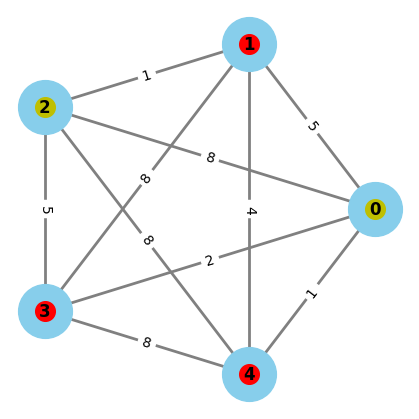

In [ ]:
# Partition the indices based on the result
partition_indices_pos = [i for i in range(len(x)) if x[i].real ==  1]
partition_indices_neg = [i for i in range(len(x)) if x[i].real == -1]

print("Partition 1 Indices:", partition_indices_pos)
print("Partition 2 Indices:", partition_indices_neg)

# Get positions for the nodes (circular layout)
pos = nx.circular_layout(G)

# Draw the graph
plt.figure(figsize=(4, 4))
nx.draw(G, pos, with_labels=True, node_size=1500, node_color='skyblue', font_size=12, font_weight='bold', width=2, edge_color='gray')
nx.draw_networkx_nodes(G, pos, nodelist=partition_indices_pos, node_color='r', node_size=200)
nx.draw_networkx_nodes(G, pos, nodelist=partition_indices_neg, node_color='y', node_size=200)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)
# nx.draw_networkx_edges(G, pos, edgelist=G.edges, width=1.0, alpha=0.5)
plt.axis('off')
plt.show()

Let's visualize the result.

Partition 1 Indices: [1, 2]
Partition 2 Indices: [0, 3, 4]


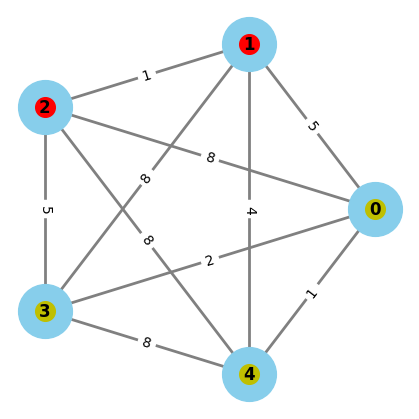

In [ ]:
partition_indices_pos = [i for i in range(len(x)) if x[i].real ==  1]
partition_indices_neg = [i for i in range(len(x)) if x[i].real == -1]

print("Partition 1 Indices:", partition_indices_pos)
print("Partition 2 Indices:", partition_indices_neg)

pos = nx.circular_layout(G)
plt.figure(figsize=(4, 4))
nx.draw(G, pos, with_labels=True, node_size=1500, node_color='skyblue', font_size=12, font_weight='bold', width=2, edge_color='gray')
nx.draw_networkx_nodes(G, pos, nodelist=partition_indices_pos, node_color='r', node_size=200)
nx.draw_networkx_nodes(G, pos, nodelist=partition_indices_neg, node_color='y', node_size=200)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)
# nx.draw_networkx_edges(G, pos, edgelist=G.edges, width=1.0, alpha=0.5)
plt.axis('off')
plt.show()


# **References**


1. Cambini, R., & Sodini, C. (2014). On the minimization of a class of generalized linear functions on a flow polytope. Optimization, 63(10), 1449-1464.

2. Alizadeh, F., Haeberly, J. P. A., & Overton, M. L. (1998). Primal-dual interior-point methods for semidefinite programming: convergence rates, stability and numerical results. SIAM Journal on Optimization, 8(3), 746-768.

3.   Tinoco, A. S. (2021), Graphs with NetworkX, URL: https://ansegura7.github.io/Algorithms/graphs/Graphs.html

